# Project: Investigate a Dataset - [TMDB 5000 Movie]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset under analysis consists of 10,000 movies sourced from The Movie Database (TMDb). This dataset offers valuable insights into the dynamics of the film industry, including factors influencing movie success and the impact of inflation on financial outcomes. It provides insights into various aspects such as genre popularity, financial success of movies, and the performance of directors and actors. The dataset is particularly useful for understanding the relationship between budget, revenue, and profit, as well as the factors contributing to a movie's success.
<li>Budget: The financial investment for the production of a movie. It's a significant column for understanding the financial aspect of a movie's production</li>
<li>Genres: The genre(s) of the movie. It's an important factor for understanding the type of movie and its potential audience</li>
<li>Homepage: The homepage URL of the movie. It can be used for further research or promotional purposes</li>
<li>Id: The unique identifier for each movie. It's crucial for referencing and linking to other datasets</li>
<li>Keywords: Keywords associated with the movie. They can be used for categorization and search purposes</li>
<li>Original_language: The original language of the movie. It helps in understanding the cultural context and potential audience</li>
<li>Original_title: The original title of the movie. It's significant for understanding the movie's name in its original language</li>
<li>Overview: A brief description or summary of the movie's plot. It's crucial for understanding the movie's content</li>
<li>Popularity: The popularity rating of the movie. It's an important factor for understanding the movie's appeal to the general audience</li>
<li>Production_companies: The production companies involved in the movie. It's significant for understanding the financial and production aspects of the movie</li>
<li>Production_countries: The countries where the movie was produced. It's an important factor for understanding the cultural context</li>
<li>Release_date: The date when the movie was released</li>

    
### Question(s) for Analysis

1. What is the relationship between the average budget and revenue for the top-performing movie genres?

2. How have film budgets changed on average every five years?

3. What are the top-performing directors in terms of total revenue, among those who have directed at least 10 movies?

In [32]:
# Import statements for all of the packages that I plan to use.

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# magic word
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [33]:
# Load and examine
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [34]:
# The total number of elements in the DataFrame
print(df.size)

# The dimensions of the DataFrame (rows, columns)
print(df.shape)

228186
(10866, 21)


### Conducting 4-6 operations using dataframe methods to examine data types and identify potential instances of missing or erroneous data.

In [35]:
# 1st - Checking for null values

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [36]:
# 2nd - identifies duplicate rows

duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate rows found:
         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


In [37]:
# 3rd - Counts missing values

print(df.isnull().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [38]:
# 4th - Provides summary statistics

print(df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

In [39]:
# 5th - Displays data types

print(df.dtypes)

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In [40]:
# 6th - Determines the dataset's range of years.

df.release_year.max(), df.release_year.min()


(2015, 1960)

In [41]:
#   7th - Shows the number of unique values in each column.

print(df.nunique())

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


##  Data Problems

 1) Some column types are incorrect and needs to be changed
 
 2) There is one duplicate row
 
 
 3) Popularity points lacks clarity. It's unclear how this metric was assessed or calculated.
 
 
 4) Rectify the missing values in the columns listed below, as they should not contain any missing data.
    - imdb_id                   10
    - cast                      76
    - homepage                7930
    - director                  44
    - tagline                 2824
    - keywords                1493
    - overview                   4
    - genres                    23
    - production_companies    1030
    
  5) Columns 'budget' and 'revenue' contain numerous '0' values, which is abnormal and lacks clarity.
  
  6) Column 'genre' contains multiple values seperated by '|'
    
## Data Cleaning 

 1) Remove columns not being used
 
 2) Change the following column types
    - release_date: Convert to datetime
    - genres: Convert to category
    
 3) Delete duplicate row with ID: 42194
 
 4) Delete rows with blank values in columns genre, and directors 
 
 5) Delete rows with '0' values in the 'budget' and 'revenue' columns due to uncertainty. 
 
 6) Extract unique values from the 'genre' column separated by '|' to ensure accurate calculation by creating separate rows for each.
 
 
 
 

## Performing Data Cleansing 

In [42]:
# Copy of original df
TMDB=df.copy()

In [43]:
# Remove columns I do not plan on using
col = ['imdb_id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'runtime','vote_count', 'vote_average']
TMDB.drop(col, axis=1, inplace=True)

In [44]:
# Confirm column headers
TMDB.head(1)

,id,budget,revenue,original_title,cast,director,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09


In [45]:
# Change column types for release_date and genre
TMDB['release_date'] = pd.to_datetime(TMDB['release_date'])

# Convert 'genres' column to category
TMDB['genres'] = TMDB['genres'].astype('category')

In [46]:
#drop duplicated rows
TMDB.drop_duplicates(inplace=True)

In [47]:
# delete nulls in director and genres column
drop_columns = ['genres', 'director']

# Drop rows with null values in specified columns
TMDB.dropna(subset=drop_columns, how='any', inplace=True)

In [48]:
# Delete rows with '0' values in the 'budget' and 'revenue' columns
TMDB = TMDB[(TMDB['budget'] != 0) & (TMDB['revenue'] != 0)]

In [49]:
# Performing genre separation and generating additional rows for each genre
genre_split = TMDB['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)

# Assigning a name to the newly created column
genre_split.name = 'genre'

# Integrating the newly created column with the original DataFrame
TMDB = TMDB.drop('genres', axis=1).join(genre_split)

# Displaying the top 10 rows with columns 'id', 'original_title', and 'genre'
print(TMDB[['id', 'original_title', 'genre']].head(10))

       id      original_title            genre
0  135397      Jurassic World           Action
0  135397      Jurassic World        Adventure
0  135397      Jurassic World  Science Fiction
0  135397      Jurassic World         Thriller
1   76341  Mad Max: Fury Road           Action
1   76341  Mad Max: Fury Road        Adventure
1   76341  Mad Max: Fury Road  Science Fiction
1   76341  Mad Max: Fury Road         Thriller
2  262500           Insurgent        Adventure
2  262500           Insurgent  Science Fiction


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 What is the relationship between the average budget and revenue for the top-performing movie genres?

In [50]:
# Step 1: Filter out movies with missing values in 'genre' or 'revenue' columns
TMDB.dropna(subset=['genre', 'revenue'], inplace=True)

# Check if there are any missing values in 'genre' or 'revenue' columns
missing_values = TMDB[['genre', 'revenue']].isnull().any()

# If there are no missing values, the filter worked
if not missing_values.any():
    print("Filtering successful: No missing values in 'genre' or 'revenue' columns.")
else:
    print("Filtering failed: There are still missing values in 'genre' or 'revenue' columns.")


Filtering successful: No missing values in 'genre' or 'revenue' columns.


In [51]:
# Step 2: Group by 'genre' and calculate average budget and revenue
genre_stats = TMDB.groupby('genre').agg({'budget': 'mean', 'revenue': 'mean'})

In [52]:
# Step 3: Sort genres by total revenue in descending order
sorted_genres = genre_stats.sort_values(by='revenue', ascending=False)

In [53]:
# Step 7: Select the top 15 genres
top_15_genres = sorted_genres.head(15)
print("Top 15 genres selected.")

Top 15 genres selected.


In [54]:
# Step 8: Print the top 15 genres with their average budget and total revenue
print("Top 15 Highest Revenue Movie Genres and Average Budget:")
print(top_15_genres)

Top 15 Highest Revenue Movie Genres and Average Budget:
                       budget       revenue
genre                                      
Animation        7.693647e+07  2.571215e+08
Adventure        6.993891e+07  2.182919e+08
Fantasy          7.071740e+07  2.182341e+08
Family           6.247916e+07  2.031535e+08
Science Fiction  5.598682e+07  1.639331e+08
Action           5.644044e+07  1.565772e+08
War              4.225584e+07  1.060321e+08
Thriller         3.729460e+07  9.774046e+07
Comedy           3.313038e+07  9.740019e+07
Mystery          3.506373e+07  9.104578e+07
Western          5.283489e+07  8.741292e+07
Romance          2.731001e+07  8.586024e+07
Crime            3.303574e+07  8.414309e+07
Music            2.578206e+07  8.266759e+07
History          4.070522e+07  8.140524e+07


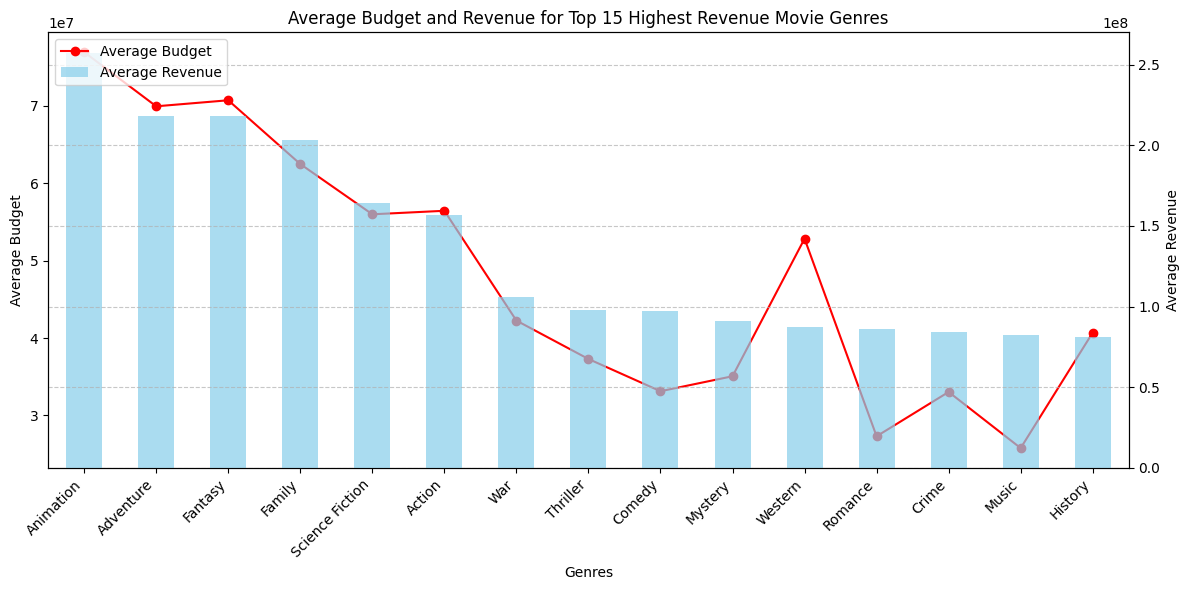

In [55]:
# Step 8: Visualize the top 15 genres and their average budget
plt.figure(figsize=(12, 6))
# Plot average budget on the left y-axis
ax1 = plt.gca()
top_15_genres['budget'].plot(kind='line', ax=ax1, color='red', linestyle='-', marker='o', label='Average Budget')
ax1.set_ylabel('Average Budget')

# Create a secondary y-axis for revenue
ax2 = ax1.twinx()
top_15_genres['revenue'].plot(kind='bar', ax=ax2, color='skyblue', alpha=0.7, label='Average Revenue')
ax2.set_ylabel('Average Revenue')

# Set title and labels
plt.title('Average Budget and Revenue for Top 15 Highest Revenue Movie Genres')
ax1.set_xlabel('Genres')
ax1.set_xticklabels(top_15_genres.index, rotation=45, ha='right')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Research Question 2  How have film budgets changed on average every five years?

In [56]:
# Step 1: Define Function to Calculate Average Budget Change
def average_budget_change(data, start_year, end_year):
    subset = data[(data['release_year'] >= start_year) & (data['release_year'] < end_year)]
    average_budget = subset['budget'].mean()
    return average_budget

In [57]:
# Step 2: Analyze Data Over Five-Year Periods
start_years = range(1960, 2020, 5)
end_years = range(1965, 2025, 5)

average_budgets = []
for start, end in zip(start_years, end_years):
    avg_budget = average_budget_change(TMDB, start, end)  # Remove str() conversion
    average_budgets.append(avg_budget)

# Print the results
print("Average budget for each five-year period:")
for i, start_year in enumerate(start_years):
    print(f"  - {start_year}-{start_year+4}: ${average_budgets[i]:,.2f}")

Average budget for each five-year period:
  - 1960-1964: $6,393,615.66
  - 1965-1969: $7,828,875.48
  - 1970-1974: $5,431,842.24
  - 1975-1979: $10,213,417.20
  - 1980-1984: $14,202,859.15
  - 1985-1989: $16,012,103.99
  - 1990-1994: $26,285,571.43
  - 1995-1999: $42,912,748.53
  - 2000-2004: $49,547,979.24
  - 2005-2009: $46,547,840.43
  - 2010-2014: $54,815,988.92
  - 2015-2019: $54,965,399.16


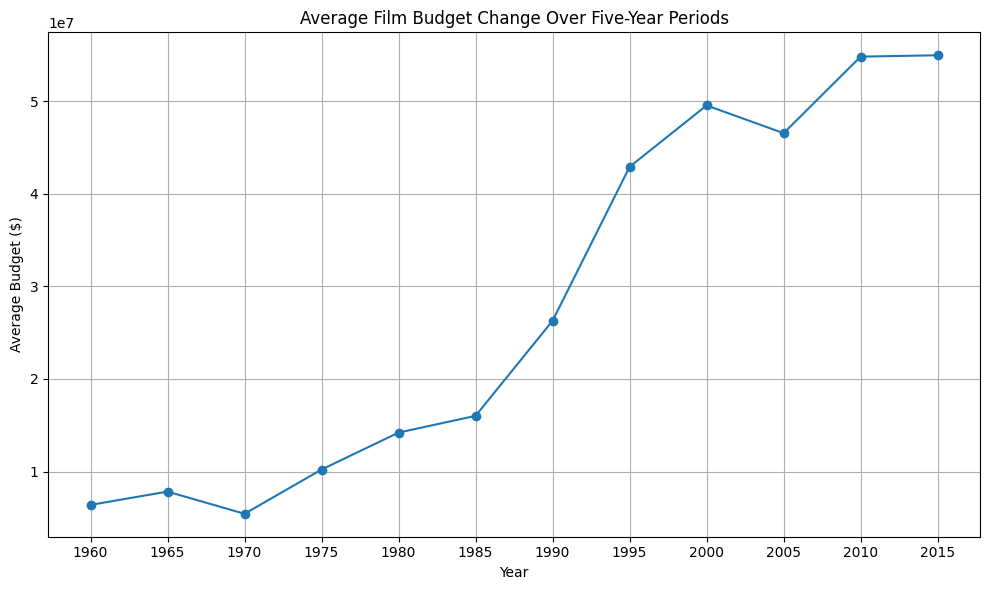

In [58]:
# Step 3: Plotting
plt.figure(figsize=(10, 6))
plt.plot(start_years, average_budgets, marker='o')
plt.title('Average Film Budget Change Over Five-Year Periods')
plt.xlabel('Year')
plt.ylabel('Average Budget ($)')
plt.grid(True)
plt.xticks(start_years)
plt.tight_layout()
plt.show()

### Research Question 3  What are the top-performing directors in terms of total revenue, among those who have directed at least 10 movies?

In [59]:
# Step 1: Group by director and calculate total revenue
director_revenue = TMDB.groupby('director')['revenue'].sum().reset_index()

In [60]:
# Step 2: Find the top 10 directors with the highest total revenue
top_directors = director_revenue.nlargest(10, 'revenue')
print(top_directors)

               director      revenue
1548   Steven Spielberg  24663086098
643       James Cameron  20132327500
1242      Peter Jackson  17530037629
1068        Michael Bay  16297866403
260   Christopher Nolan  16196885522
381         David Yates  13401099613
1377    Robert Zemeckis  13064895818
629         J.J. Abrams  12805687973
1596         Tim Burton  11811526116
486    Francis Lawrence  11443904006


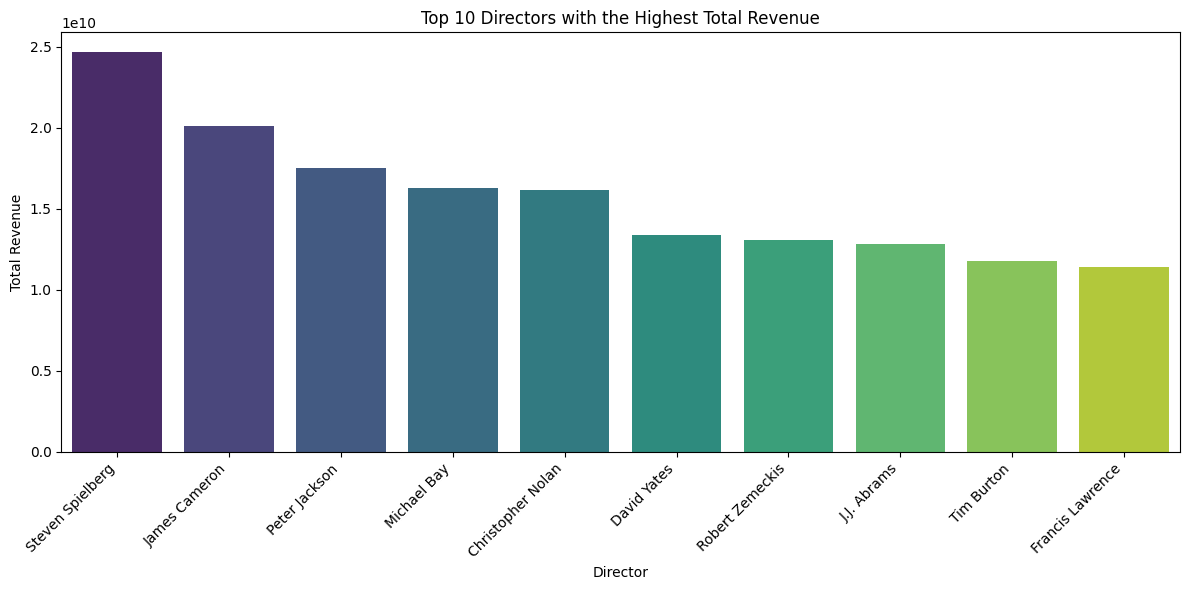

In [61]:
# Step 3: Visualize the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='director', y='revenue', palette='viridis')
plt.title('Top 10 Directors with the Highest Total Revenue')
plt.xlabel('Director')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# <a id='conclusions'></a>
## Conclusions


Conclusions:

**1. Relationship Between Average Budget and Revenue for Top-Performing Movie Genres**

The analysis dived into examining the relationship between the average budget and revenue for top-performing movie genres. It was noted that genres such as Animation, Adventure, Fantasy, and Family appeared to yield the highest average revenues. This suggests these genres have a solid commercial appeal and tend to perform well at the box office. However, despite their high revenues, these genres also exhibited relatively high average budgets, indicating significant investments in production. This likely stems from the need for advanced special effects, animation, and production design. Additionally, genres like Action, Science Fiction, and Thriller, while not boasting the highest budgets compared to genres like Animation, still managed to generate substantial returns, reflecting audience preferences. While investing in genres such as Animation, Adventure, and Fantasy seems promising for high returns on investment, maintaining a balance in budget allocation is crucial to ensuring profitability. Overall, this analysis offers insights that can assist filmmakers, producers, and investors in navigating market trends and making informed decisions in the film industry.

**Limitation:** 
It's important to note a limitation in the analysis due to the absence of certain data that could provide a more comprehensive understanding. Factors like marketing budgets, distribution strategies, and audience demographics, although influential, were not included in the dataset, potentially limiting the depth of insights derived.

**2. Changes in Film Budgets Over Five-Year Periods**

The analysis investigated the average changes in film budgets over five-year periods. It was observed that there is a general increasing trend in average film budgets over the years, suggesting a tendency towards higher production costs in the film industry. Notable periods of rapid growth in average film budgets were identified, such as the transition from the 1990s to the 2000s, where there was a significant surge from around $26 million to nearly $50 million. Despite this overall upward trend, there were also periods of relatively stable average budgets, particularly from the late 1970s to the early 1990s. However, recent trends indicate another significant increase in average film budgets, particularly from 2010 onwards, with figures surpassing $50 million.

**3. Top-Performing Directors in Terms of Total Revenue**

The analysis highlighted the top-performing directors in terms of total revenue among those who have directed at least 10 movies. Directors such as Steven Spielberg, James Cameron, and Peter Jackson emerged as significant influencers in the film industry, occupying the top positions in terms of total revenue. Their consistent track record of delivering financially successful films over the years underscores their impact. The success of these directors reflects the importance of investing in talented filmmakers with a proven track record of delivering successful projects. Studios and producers may continue to prioritize collaborations with established directors to mitigate risks and maximize returns on investment.

**Additional Research Opportunities:**
Further research opportunities lie in exploring the specific factors contributing to the observed trends in film budgets and revenue. Factors such as changes in production technologies, shifts in audience preferences, or the influence of global markets on the film industry could be investigated. Additionally, delving into the role of marketing strategies and distribution channels in driving movie revenue could provide deeper insights into the dynamics of the industry.